<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Изучение данных</a></span><ul class="toc-item"><li><span><a href="#Сохранение-данных" data-toc-modified-id="Сохранение-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Сохранение данных</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Вывод-" data-toc-modified-id="Вывод--2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Вывод </a></span></li></ul></li><li><span><a href="#Разделение-данных-на-выборки" data-toc-modified-id="Разделение-данных-на-выборки-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Разделение данных на выборки</a></span></li><li><span><a href="#Сравнение-моделей" data-toc-modified-id="Сравнение-моделей-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Сравнение моделей</a></span><ul class="toc-item"><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Вывод-(после-ревью)" data-toc-modified-id="Вывод-(после-ревью)-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Вывод (после ревью)</a></span></li></ul></li><li><span><a href="#Проверка-модели-на-тестовой-выборке" data-toc-modified-id="Проверка-модели-на-тестовой-выборке-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка модели на тестовой выборке</a></span></li><li><span><a href="#Проверка-модели-на-адекватность" data-toc-modified-id="Проверка-модели-на-адекватность-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Проверка модели на адекватность</a></span></li><li><span><a href="#Общий-вывод-" data-toc-modified-id="Общий-вывод--7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Общий вывод </a></span></li></ul></div>

<div style="border-radius: 15px; border:solid navy 3px; padding: 20px"> <h1 style="color:navy; margin-bottom:20px">Введение в машинное обучение </h1>
    
# Описание проекта
    
Оператор мобильной связи «Мегалайн» выяснил: многие клиенты пользуются архивными тарифами. Они хотят построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».

Предобработка данных на данном этапе не понадобится, поскольку она уже проведена.

    
# Цель исследования:
    
Изучив имеющиеся данные, построить модель, которая выберет подходящий тариф, с максимально большим значением accuracy. 
    
Целевое значение accuracy: **не менее 0.75** 

## Импорт библиотек

In [1]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

warnings.filterwarnings('ignore')

RANDOM_STATE = 12345

## Изучение данных

### Сохранение данных

Сохраним данные в переменную **df**.

In [2]:
df = pd.read_csv(
    'D:/1_Проекты Практикум/М_2/5_Рекомендация тарифов/users_behavior.csv'
)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [3]:
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [4]:
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


In [5]:
def boxplot_hist(df, input_column):

# Диаграмма размаха 
# Выбросы
    flierprops = dict(
        marker='o', 
        markerfacecolor='None', 
        markersize=3,  
        markeredgecolor='navy'
    )
    
    sns.set(
        rc={
            'figure.figsize':(18,1)
        })
    
    ax = sns.boxplot(
        x=df[input_column],
        showmeans=True,
        color='navy',
        width = .4,
        meanprops={
            "marker":"o",
            "markerfacecolor":"#fffafa", 
            "markeredgecolor":"#42024d",
            "markersize":"8"
        },
        flierprops = flierprops
    )
    plt.title(
        'Диаграмма размаха для значений в столбце {0}'.format(
            input_column.upper()), 
        fontsize=15
    )
    
# Гистограмма    
    fig= plt.subplots(figsize=(16,2.5))
    sns.distplot(
        df[input_column],
        color='navy',
    ).set_title(
        'Гистограмма значений в столбце {0}'.format(
            input_column.upper()), 
        fontsize=15
    )
    plt.show()

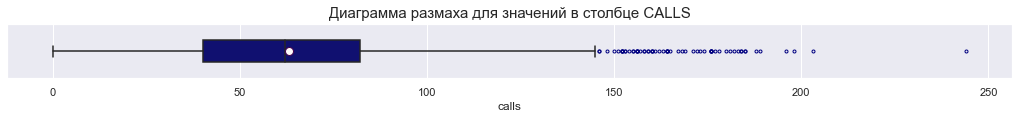

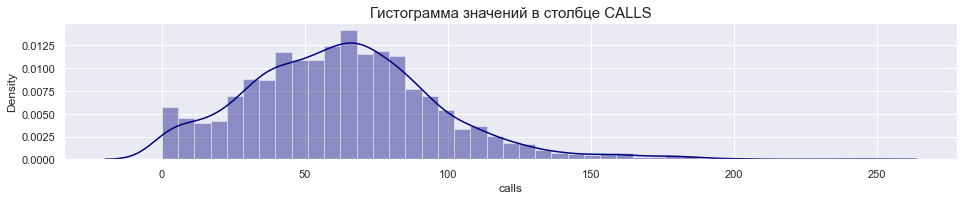

In [6]:
boxplot_hist(df,'calls')

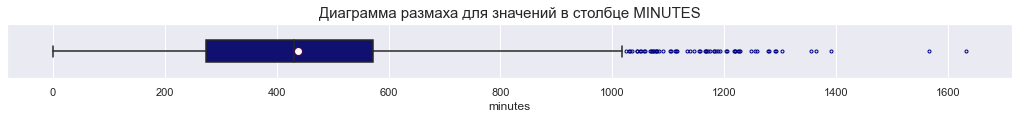

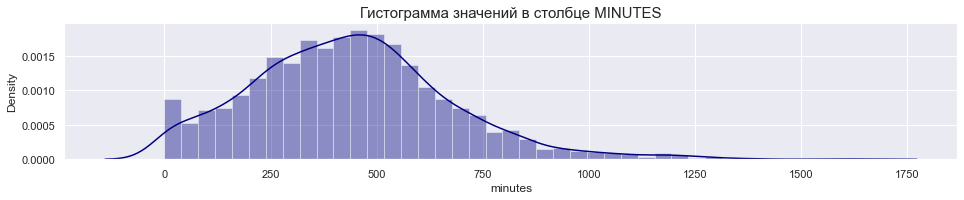

In [7]:
boxplot_hist(df,'minutes')

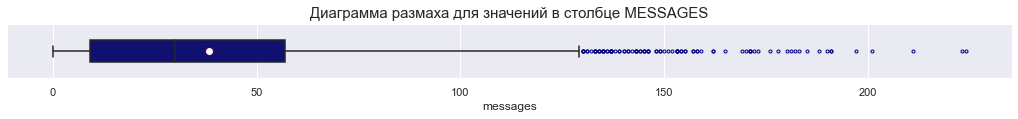

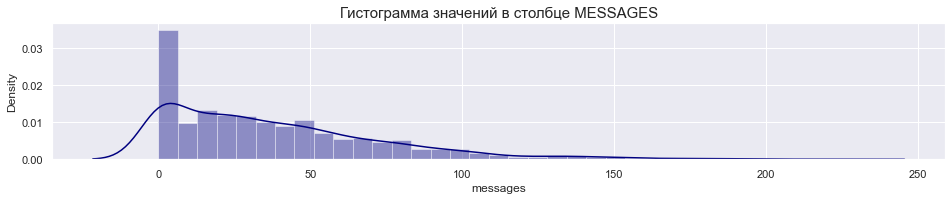

In [8]:
boxplot_hist(df,'messages')

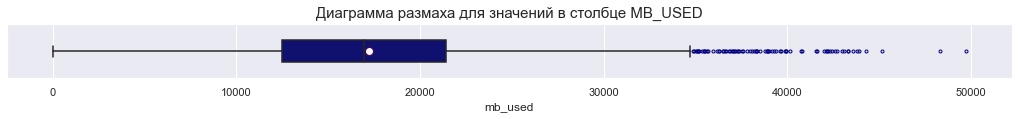

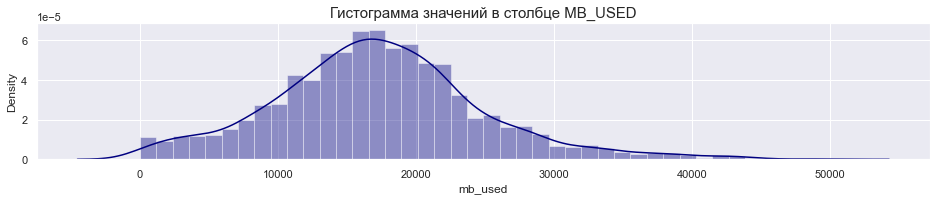

In [9]:
boxplot_hist(df,'mb_used')

In [10]:
df['is_ultra'].value_counts()

0    2229
1     985
Name: is_ultra, dtype: int64

### Описание данных
    
Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц. Известно:
    
* **сalls** — количество звонков,
* **minutes** — суммарная длительность звонков в минутах,
* **messages** — количество sms-сообщений,
* **mb_used** — израсходованный интернет-трафик в Мб,
* **is_ultra** — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

<div style="border-radius: 15px;border:solid navy 2px; padding: 20px"> <h3 style="color:navy; margin-bottom:20px">Вывод </h3>

* Данные содержат информацию о поведении одного пользователя за месяц. Одна строка содержит количество и общую длительность звонков, количество сообщений и объем интернет-трафика, использованных одним пользователем за месяц.
* Таблица содержит **3214** строк, каждая строка содержит данные о поведении одного пользователя за месяц.
* Данные содержатся в **5** столбцах
* При первичном анализе пропусков, некорректных названий столбцов или типов данных не обнаружено. Аномальных значений также на этом этапе обнаружено не было, поэтому для целей данного исследования предобработка данных не потребуется.
* Целевым признаком исследования является тариф, который использует пользователь ("Смарт" или "Ультра"). Поскольку целевой столбец `is_ultra` принимает только одно из двух значений (1 или 0), перед нами задача классификации. </div>

## Разделение данных на выборки

Выделим признаки и целевой признак в датасете.

In [11]:
# Признаки
features = df.drop(
    ['is_ultra'], 
    axis = 1
) 

# Целевой признак
target = df['is_ultra']

Выделим тестовую выборку из датасета. Для избежания влияния дисбаланса классов на результаты работы модели добавим стратификацию при разделении данных на выборки с помощью атрибута `stratify`.

In [12]:
(
    features, 
    features_test, 
    target, 
    target_test
) = train_test_split(
    features,
    target, 
    test_size=0.2,
    random_state = RANDOM_STATE,
    stratify=target
)

Разделим оставшийся объем данных на валидационную и обучающую выборки, также учитывая вероятный дисбаланс классов.

In [13]:
(
    features_train, 
    features_valid, 
    target_train, 
    target_valid
) = train_test_split(
    features, 
    target, 
    test_size=0.25, 
    random_state = RANDOM_STATE,
    stratify = target
)

Проверим корректность создания выборок и выделения признаков.

In [14]:
shape_vocab = {
    'Выборка': [
        'Исходная',
        'Тестовая', 
        'Валидационная',
        'Обучающая'
    ],
    'Признаки': [
        df.shape,
        features_test.shape,
        features_valid.shape,
        features_train.shape
    ],
    'Целевой признак': [
        'NaN',
        target_test.shape,
        target_valid.shape,
        target_train.shape
    ],
    'Доля выборки, %': [
        'NaN',
        round(
            (target_test.shape[0]*100)/df.shape[0],
            1),
        round(
            (target_valid.shape[0]*100)/df.shape[0],
            1),
        round(
            (target_train.shape[0]*100)/df.shape[0],
            1)
    ]}

shape_df = pd.DataFrame(
    data=shape_vocab
)
shape_df

,Выборка,Признаки,Целевой признак,"Доля выборки, %"
0,Исходная,"(3214, 5)",NaN,NaN
1,Тестовая,"(643, 4)","(643,)",20.0
2,Валидационная,"(643, 4)","(643,)",20.0
3,Обучающая,"(1928, 4)","(1928,)",60.0


Выборки и признаки выделены корректно, двигаемся дальше.

## Сравнение моделей

Для решения задачи классификации сравним точность работы следующих моделей:

1. Дерево решений
1. Случайный лес
1. Логистическая регрессия

### Дерево решений

С помощью цикла найдем оптимальное значение параметра `max_depth`.

In [15]:
print(
    'Accuracy на валидационной выборке:'
)

for depth in range(1, 15):
    model = DecisionTreeClassifier(
        random_state=RANDOM_STATE, 
        max_depth = depth
    ) 
    model.fit(
        features_train, 
        target_train
    )
    predictions_valid = model.predict(
        features_valid
    ) 
    print(
        "max_depth =", 
        depth, 
        ": ", 
        end=''
    )
    print(
        accuracy_score(
            target_valid, 
            predictions_valid
        ).round(5)
    ) 

Accuracy на валидационной выборке:
max_depth = 1 : 0.75894
max_depth = 2 : 0.78383
max_depth = 3 : 0.80404
max_depth = 4 : 0.80404
max_depth = 5 : 0.81649
max_depth = 6 : 0.80249
max_depth = 7 : 0.80715
max_depth = 8 : 0.8056
max_depth = 9 : 0.81182
max_depth = 10 : 0.8056
max_depth = 11 : 0.80715
max_depth = 12 : 0.78538
max_depth = 13 : 0.78694
max_depth = 14 : 0.78383


Изменяя гиперпараметр `max_depth` находим глубину, на которой происходит переобучение. После достижении значения `max_depth` = **5** значение `accuracy` уменьшается при дальнейшем увеличении глубины.

Максимальная точность, которую удалось достигнуть с помощью модели _**Дерево решений**_ - **0.81649**

### Случайный лес

С помощью цикла найдем оптимальное значение параметра `n_estimators`.

In [16]:
best_model = None
best_result = 0

for est in range(1, 25):
    model = RandomForestClassifier(
        random_state=RANDOM_STATE, 
        n_estimators=est
    )
    model.fit(
        features_train, 
        target_train
    )
    result = model.score(
        features_valid, 
        target_valid
    )
    if result > best_result:
        best_model = model
        best_result = result

print(
    "Accuracy на валидационной выборке:", 
    best_result.round(5), 
    ", Число деревьев:", 
    est
)

Accuracy на валидационной выборке: 0.8196 , Число деревьев: 24


Оптимальная точность **0.8196** достигнута на валидационной выборке при количестве деревьев **24**. 

### Логистическая регрессия

Используем модель **_логистическая регрессия_**.

In [17]:
model = LogisticRegression(
    random_state=RANDOM_STATE, 
    solver='lbfgs', 
    max_iter=1000
)
model.fit(
    features_train, 
    target_train
)
model.predict(features_valid)

print(
    'Accuracy на валидационной выборке:',
    model.score(
        features_valid, 
        target_valid
    ).round(5)
)

Accuracy на валидационной выборке: 0.75583


Точность, достигнутая с помощью модели **_Логистическая регрессия_** на валидационной выборке, составила **0.75583**.

### Вывод (после ревью)

В результате построения моделей при проверке на валидационной выборке были достигнуты следующие значения целевой метрики: 
    
1. Дерево решений - **0.81649** 
1. Случайный лес - **0.8196** 
1. Логистическая регрессия - **0.75583** 
    
Наибольшая точность была достигнута при использовании модели **_Случайный лес_**.

## Проверка модели на тестовой выборке 

Проверим эту модель _**Случайный лес**_ с оптимальными значениями гиперпараметров на тестовой выборке.

In [18]:
model = RandomForestClassifier(
    random_state=RANDOM_STATE, 
    n_estimators=9
)
model.fit(features, target)
predictions_test = model.predict(
    features_test
)

print(
    'Accuracy на валидационной выборке:',
    accuracy_score(
        target_test, 
        predictions_test
    ).round(5)
)

Accuracy на валидационной выборке: 0.78072


Точность, полученная при проверке модели на тестовой выборке, составляет **0.78072**.

## Проверка модели на адекватность

Проверим частоту классов в исходном целевом столбце датасета.

0    0.693528
1    0.306472
Name: is_ultra, dtype: float64


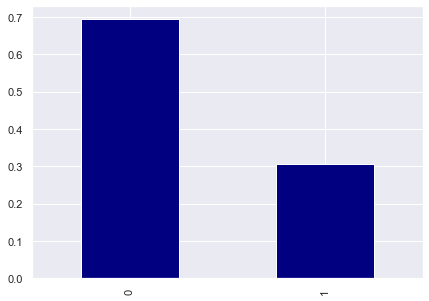

In [19]:
sns.set(
        rc={
            'figure.figsize':(7,5)
        })

print(
    df[
        'is_ultra'
    ].value_counts(
        normalize=True
    ))

df[
    'is_ultra'
].value_counts(
    normalize=True
).plot(
    kind='bar',
    color='navy'
);

Проверим частоты классов в результатах предсказаний выбранной модели.

0    0.695179
1    0.304821
dtype: float64


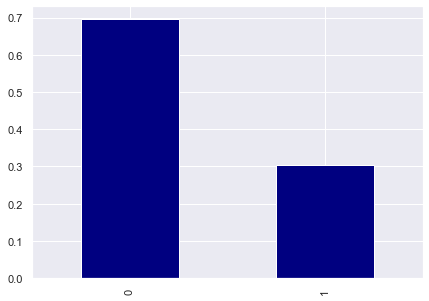

In [20]:
predictions = pd.Series(
    model.predict(features_valid)
)

print(
    predictions.value_counts(
        normalize=True
    ))

predictions.value_counts(
    normalize=True
).plot(
    kind='bar',
    color='navy'
);

Посчитаем точность для константной модели.

In [21]:
target_pred_constant = pd.Series(
    0, 
    index=target.index
)

print(
    accuracy_score(
        target, 
        target_pred_constant
    ).round(6)
)

0.693504


Поскольку частота классов в результатах предсказания больше, чем для константной модели, проверка на адекватность пройдена.

<div style="border-radius: 15px;border:solid navy 2px; padding: 20px"> <h2 style="color:navy; margin-bottom:20px">Общий вывод </h2>
    
* Данные содержат информацию о **поведении одного пользователя за месяц**. Одна строка содержит количество и общую длительность звонков, количество сообщений и объем интернет-трафика, использованных одним пользователем за месяц.

* **Предобработка данных не потребовалась** - пропусков, дубликатов, аномальных значений и некорректных типов данных обнаружено не было.
    
* Данные были разделены на выборки в отношении **3:1:1**. В проекте использовалось значение `RANDOM_STATE = 12345`.

* Наибольшая точность была достигнута при использовании модели **_Случайный лес_**. 
    
* Точность, полученная при проверке модели на тестовой выборке, составляет **0.78072**.